# Reading Dataset

In [1]:
import pandas as pd
import numpy as np
import tensorflow

data = pd.read_csv('Human_activity_Dataset.csv')


In [2]:
data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
data['Activity'].value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

In [4]:
num_inst = data['Activity'].value_counts()

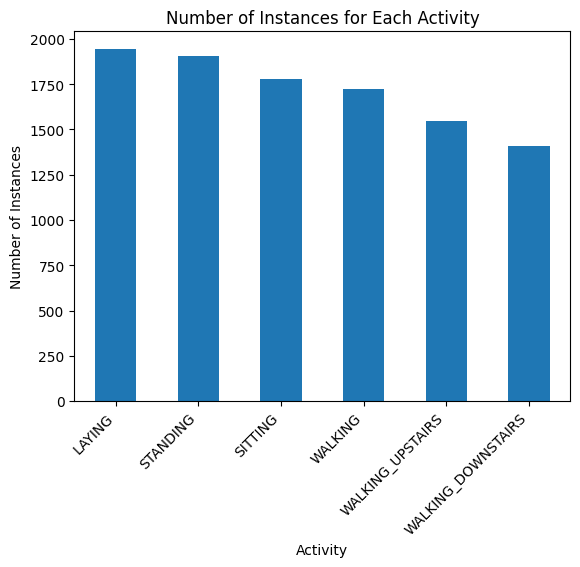

In [5]:
import matplotlib.pyplot as plt

ax = num_inst.plot(kind='bar')
plt.xlabel('Activity')
plt.ylabel('Number of Instances')
plt.title('Number of Instances for Each Activity')

# Rotate x-axis labels by 45 degrees
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

In [6]:
n_class = 6

In [7]:
Y = data.Activity
Y

0                STANDING
1                STANDING
2                STANDING
3                STANDING
4                STANDING
               ...       
10294    WALKING_UPSTAIRS
10295    WALKING_UPSTAIRS
10296    WALKING_UPSTAIRS
10297    WALKING_UPSTAIRS
10298    WALKING_UPSTAIRS
Name: Activity, Length: 10299, dtype: object

In [8]:
label = {'LAYING': 0, 'STANDING': 1, 'SITTING': 2, 'WALKING': 3, 'WALKING_UPSTAIRS': 4, 'WALKING_DOWNSTAIRS': 5}
data['label']= data['Activity'].map(label)
data.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject/Participant,Activity,label
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,1
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,1
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,1
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,1
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,1


In [9]:
y = data.label
y

0        1
1        1
2        1
3        1
4        1
        ..
10294    4
10295    4
10296    4
10297    4
10298    4
Name: label, Length: 10299, dtype: int64

In [10]:
y = np.array(y)
y = y[:, np.newaxis]
y.shape

(10299, 1)

In [11]:
from tensorflow.keras.utils import to_categorical

n_class = 6

print('raw labels: \n', y[48 : 53])

y = to_categorical(y, n_class)

print('one hot encoded labels: \n', y[48 : 53, :])
y.shape

raw labels: 
 [[2]
 [2]
 [2]
 [0]
 [0]]
one hot encoded labels: 
 [[0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


(10299, 6)

Showing the Head of All Columns

In [12]:
pd.set_option('display.max_columns', None)
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [13]:
a = data['subject/Participant']
a.value_counts()

25    409
21    408
26    392
30    383
28    382
24    381
27    376
23    372
17    368
16    366
18    364
19    360
20    354
1     347
29    344
3     341
15    328
13    327
6     325
14    323
22    321
12    320
4     317
11    316
7     308
5     302
2     302
10    294
9     288
8     281
Name: subject/Participant, dtype: int64

# Data Processing

## Correlation Matrix Before PCA

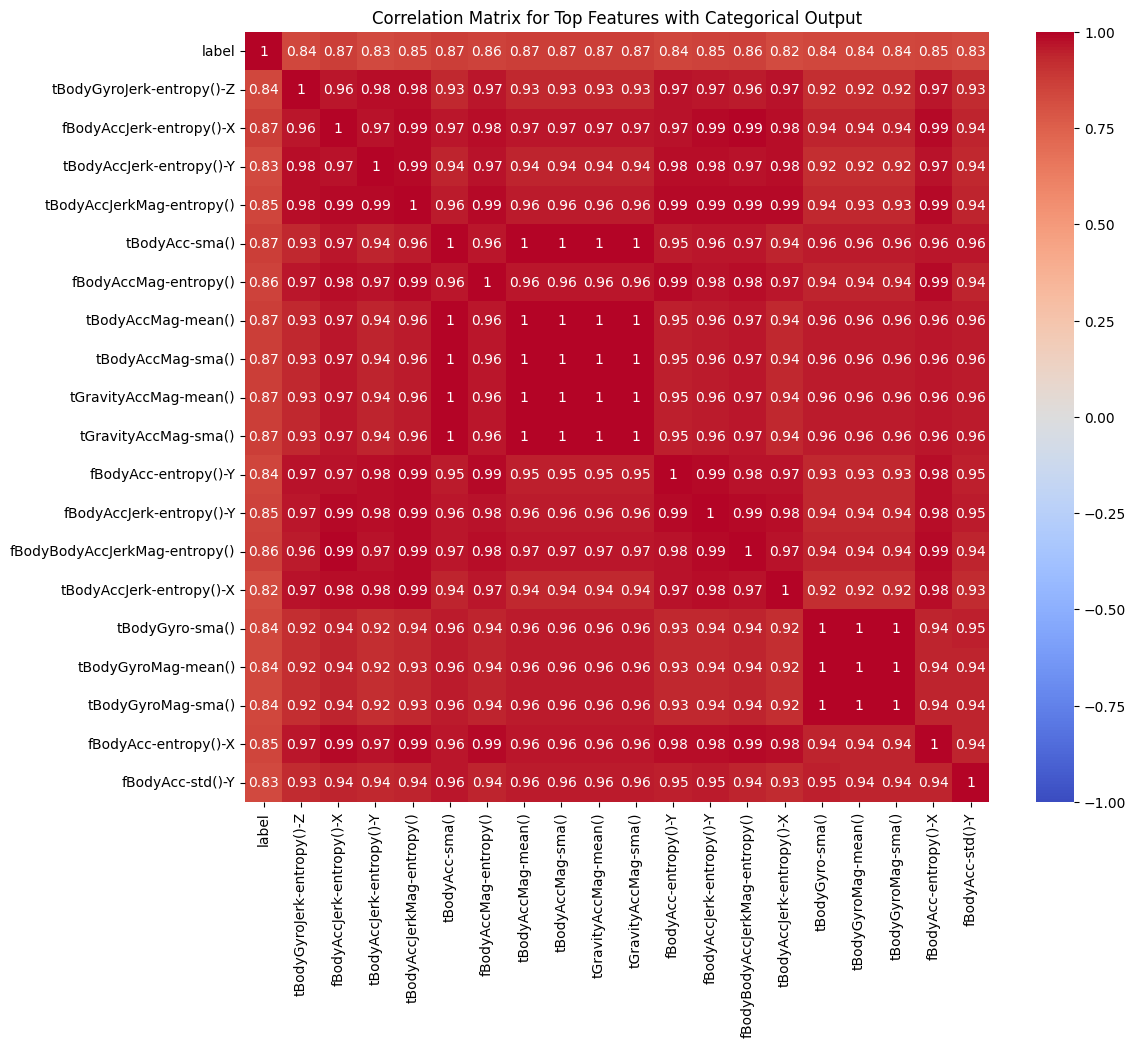

In [14]:
import seaborn as sns
# Calculate the correlation with the categorical output variable
correlation_with_output = data.drop('Activity', axis=1).apply(lambda x: x.corr(data['Activity'].astype('category').cat.codes))

# Select the top N features (e.g., top 10)
top_features = correlation_with_output.abs().nlargest(20).index

# Extract the selected features and create a subset DataFrame
selected_features_df = data[top_features]

# Plot the correlation matrix for the selected features
correlation_matrix = selected_features_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Top Features with Categorical Output')
plt.show()

## PCA

In [15]:
# find categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Print the number of categorical features and their names
num_categorical_features = len(categorical_features)
print(f"Number of categorical features: {num_categorical_features}")
print("Categorical features:", categorical_features)

Number of categorical features: 1
Categorical features: Index(['Activity'], dtype='object')


In [16]:
# Split features and label
X = data.drop('Activity', axis=1)  # Features
y = data['Activity']  # Label

# Convert categorical data to one-hot encoding
y = pd.get_dummies(y, columns=['Activity'], prefix='Category')

# Display the resulting DataFrame
print(y.head())

X = np.array(X)
y = np.array(y)

   Category_LAYING  Category_SITTING  Category_STANDING  Category_WALKING  \
0                0                 0                  1                 0   
1                0                 0                  1                 0   
2                0                 0                  1                 0   
3                0                 0                  1                 0   
4                0                 0                  1                 0   

   Category_WALKING_DOWNSTAIRS  Category_WALKING_UPSTAIRS  
0                            0                          0  
1                            0                          0  
2                            0                          0  
3                            0                          0  
4                            0                          0  


In [17]:
X.shape

(10299, 563)

In [18]:
y.shape

(10299, 6)

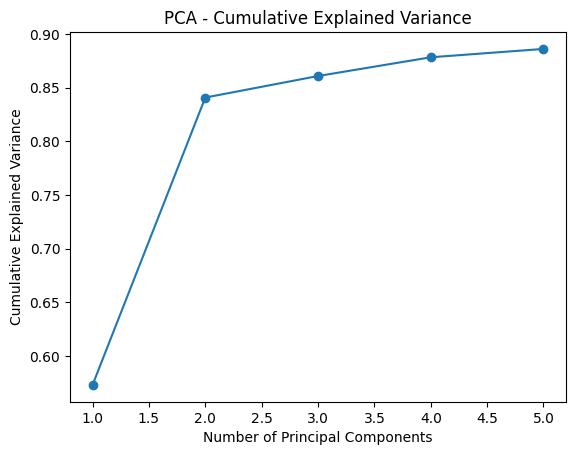

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Perform PCA
pca = PCA(5)
pca_result = pca.fit_transform(X)

# Explained variance ratio
explained_var_ratio = pca.explained_variance_ratio_

# Plot the cumulative explained variance
cumulative_explained_var = np.cumsum(explained_var_ratio)
plt.plot(range(1, len(cumulative_explained_var) + 1), cumulative_explained_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.show()

## Select best components

In [20]:
pca_result.shape

(10299, 5)

In [21]:
y.shape

(10299, 6)

## Data Splitting

In [22]:
from sklearn.model_selection import train_test_split


# Split the data into training (70%) and temporary data (30%)
X_train, X_temp, y_train, y_temp = train_test_split(pca_result, y, test_size=0.3, random_state=42)

# Split the temporary data into testing (50%) and validation (50%)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [23]:

X_train.shape

(7209, 5)

In [24]:
y_train.shape

(7209, 6)

## Normalization

In [25]:
# Normalize the features
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
X_val_normalized = scaler.transform(X_val)

## Correlation Matrix After PCA

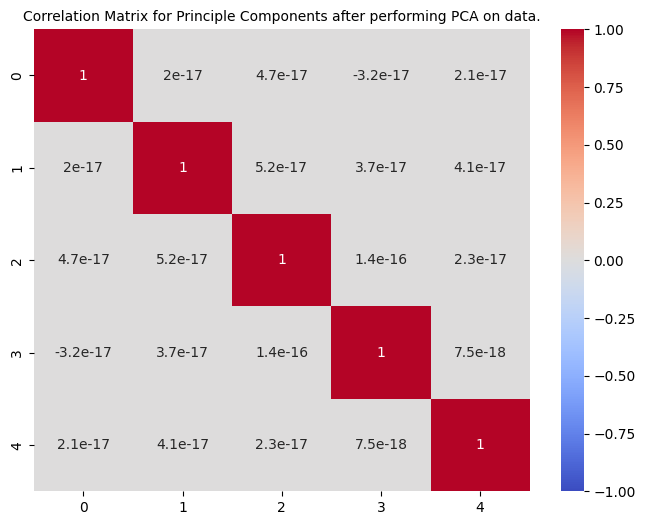

In [26]:
import seaborn as sns

# data1 = np.hstack((X_train, y_train))

# x.corr(data['Activity'].astype('category').cat.codes)

df = pd.DataFrame(pca_result)

# Plot the correlation matrix for the selected features
correlation_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Principle Components after performing PCA on data.',fontsize = 10)
plt.show()

# DNNs


## Simple DNN

In [27]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [28]:
print("\n shape:\n", X_train_normalized.shape)
print("\n shape:\n", X_test_normalized.shape)


 shape:
 (7209, 5)

 shape:
 (1545, 5)


In [45]:
inp = Input(shape = (5, ))
first_layer = Dense(4, activation = 'relu')(inp)
second_layer = Dense(3, activation = 'relu')(first_layer)
output = Dense(n_class, activation = 'softmax')(second_layer)

MLP_model = Model(inputs = inp, outputs = output)

MLP_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense_16 (Dense)            (None, 4)                 24        
                                                                 
 dense_17 (Dense)            (None, 3)                 15        
                                                                 
 dense_18 (Dense)            (None, 6)                 24        
                                                                 
Total params: 63 (252.00 Byte)
Trainable params: 63 (252.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## DNN with dropout and batch normalization

In [38]:
from tensorflow.keras.layers import Dropout, BatchNormalization

In [39]:
from tensorflow.keras import Model, Sequential

MLP_model_d = Sequential()
#input layer
MLP_model_d.add(Input(5,))

#hidden layers
MLP_model_d.add(Dense(24, activation = 'relu'))
MLP_model_d.add(Dropout(0.2))
MLP_model_d.add(BatchNormalization())

MLP_model_d.add(Dense(18, activation = 'relu'))
MLP_model_d.add(Dropout(0.2))
MLP_model_d.add(BatchNormalization())

MLP_model_d.add(Dense(12, activation = 'relu'))
MLP_model_d.add(Dropout(0.2))
MLP_model_d.add(BatchNormalization())

MLP_model_d.add(Dense(12, activation = 'relu'))
MLP_model_d.add(Dropout(0.2))
MLP_model_d.add(BatchNormalization())

# MLP_model_d.add(Dense(6, activation = 'relu'))
# MLP_model_d.add(Dropout(0.2))
# MLP_model_d.add(BatchNormalization())

#outputlayers
MLP_model_d.add(Dense(6, activation = 'softmax'))

MLP_model_d.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 24)                144       
                                                                 
 dropout_4 (Dropout)         (None, 24)                0         
                                                                 
 batch_normalization_4 (Bat  (None, 24)                96        
 chNormalization)                                                
                                                                 
 dense_12 (Dense)            (None, 18)                450       
                                                                 
 dropout_5 (Dropout)         (None, 18)                0         
                                                                 
 batch_normalization_5 (Bat  (None, 18)                72        
 chNormalization)                                     

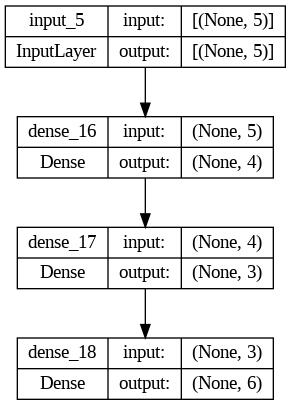

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(MLP_model, show_shapes=True)

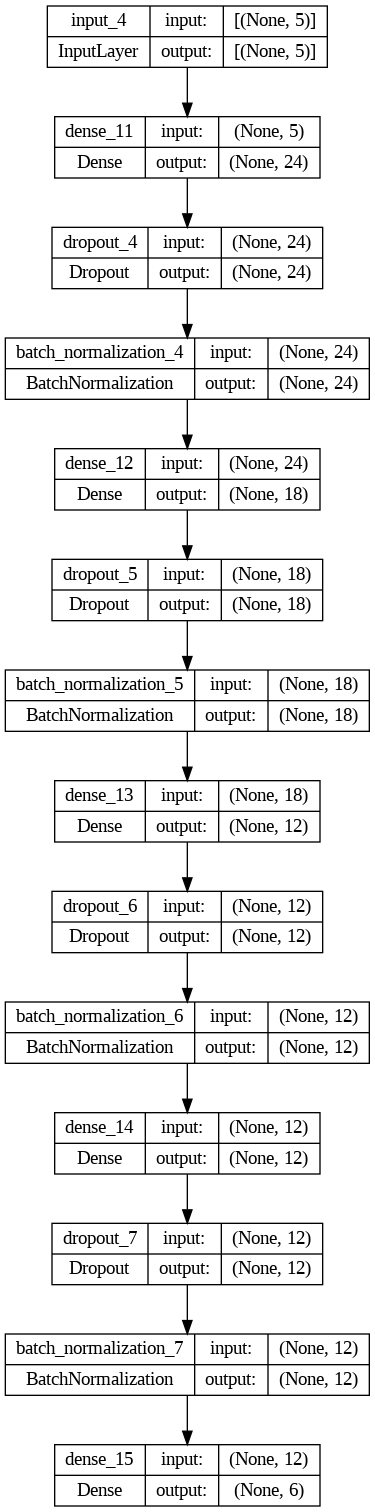

In [41]:
# from tensorflow.keras.utils import plot_model
plot_model(MLP_model_d, show_shapes=True)

In [47]:
from tensorflow.keras.optimizers import Adam

MLP_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
MLP_model_d.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
import tensorflow as tf

results = MLP_model.fit(X_train_normalized, y_train, batch_size = 128, epochs = 50, validation_data = (X_val_normalized, y_val), callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='loss')])

Epoch 1/50
57/57 [==============================] - 1s 7ms/step - loss: 1.9164 - accuracy: 0.0992 - val_loss: 1.8426 - val_accuracy: 0.0731
Epoch 2/50
57/57 [==============================] - 0s 4ms/step - loss: 1.7785 - accuracy: 0.0902 - val_loss: 1.7184 - val_accuracy: 0.1806
Epoch 3/50
57/57 [==============================] - 0s 4ms/step - loss: 1.6702 - accuracy: 0.2172 - val_loss: 1.6167 - val_accuracy: 0.2932
Epoch 4/50
57/57 [==============================] - 0s 5ms/step - loss: 1.5817 - accuracy: 0.2773 - val_loss: 1.5368 - val_accuracy: 0.3243
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 1.5098 - accuracy: 0.3003 - val_loss: 1.4721 - val_accuracy: 0.3385
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 1.4483 - accuracy: 0.3106 - val_loss: 1.4152 - val_accuracy: 0.3482
Epoch 7/50
57/57 [==============================] - 0s 4ms/step - loss: 1.3924 - accuracy: 0.3272 - val_loss: 1.3621 - val_accuracy: 0.3631
Epoch 8/50
57/57 [==

In [49]:
import tensorflow as tf

results_d = MLP_model_d.fit(X_train_normalized, y_train, batch_size=128, epochs=50, validation_data = (X_val_normalized, y_val), callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='loss')])

Epoch 1/50
57/57 [==============================] - 7s 12ms/step - loss: 1.8554 - accuracy: 0.2735 - val_loss: 1.6264 - val_accuracy: 0.5476
Epoch 2/50
57/57 [==============================] - 0s 8ms/step - loss: 1.4405 - accuracy: 0.4238 - val_loss: 1.3338 - val_accuracy: 0.6706
Epoch 3/50
57/57 [==============================] - 0s 8ms/step - loss: 1.2334 - accuracy: 0.5238 - val_loss: 1.0205 - val_accuracy: 0.7650
Epoch 4/50
57/57 [==============================] - 0s 8ms/step - loss: 1.0838 - accuracy: 0.5832 - val_loss: 0.7582 - val_accuracy: 0.8239
Epoch 5/50
57/57 [==============================] - 0s 8ms/step - loss: 0.9653 - accuracy: 0.6203 - val_loss: 0.6076 - val_accuracy: 0.8298
Epoch 6/50
57/57 [==============================] - 0s 8ms/step - loss: 0.8709 - accuracy: 0.6460 - val_loss: 0.5232 - val_accuracy: 0.8168
Epoch 7/50
57/57 [==============================] - 0s 8ms/step - loss: 0.8158 - accuracy: 0.6565 - val_loss: 0.4692 - val_accuracy: 0.8311
Epoch 8/50
57/57 [=

In [50]:
y_hat = MLP_model.predict(X_test_normalized)

# print(y_hat.shape)
# print(y_test.shape)

y_hat = np.argmax(y_hat, axis=1)


y_true = np.argmax(y_test, axis=1)
# print(y_hat.shape)
# print(y_hat_d.shape)
# print(y_true.shape)

49/49 [==============================] - 0s 2ms/step


In [51]:
y_hat_d = MLP_model_d.predict(X_test_normalized)

y_hat_d = np.argmax(y_hat_d, axis=1)

y_true = np.argmax(y_test, axis=1)

49/49 [==============================] - 0s 2ms/step


In [52]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [53]:
print(classification_report(y_true, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       0.77      0.67      0.72       294
           2       0.70      0.80      0.75       280
           3       0.96      0.97      0.97       255
           4       0.71      0.85      0.77       217
           5       0.74      0.57      0.64       198

    accuracy                           0.82      1545
   macro avg       0.81      0.81      0.81      1545
weighted avg       0.82      0.82      0.82      1545



In [54]:
# from sklearn.metrics import classification_report
print(classification_report(y_true, y_hat_d))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       301
           1       0.75      0.98      0.85       294
           2       0.98      0.65      0.78       280
           3       0.98      0.99      0.98       255
           4       0.94      0.92      0.93       217
           5       0.90      0.91      0.91       198

    accuracy                           0.91      1545
   macro avg       0.92      0.91      0.91      1545
weighted avg       0.92      0.91      0.91      1545



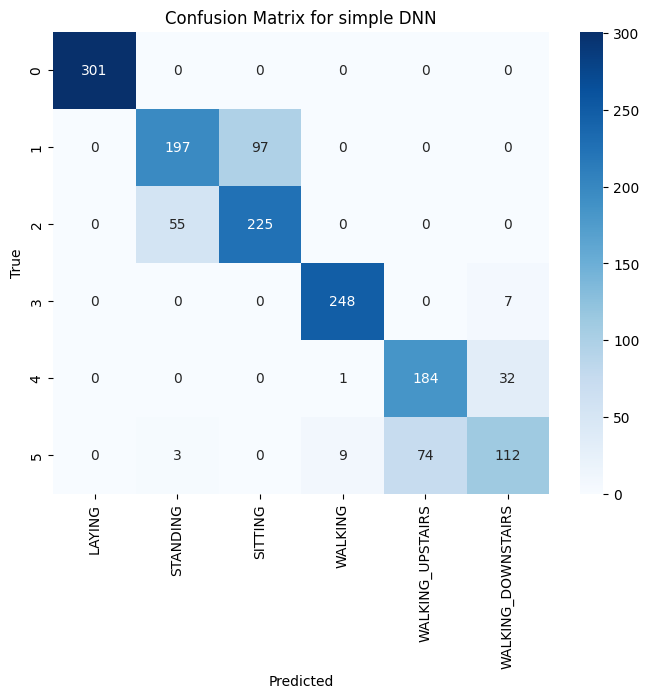

In [55]:
# print(confusion_matrix(y_true, y_hat))

conf_matrix = confusion_matrix(y_true, y_hat)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'], yticklabels=range(6))
plt.title('Confusion Matrix for simple DNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

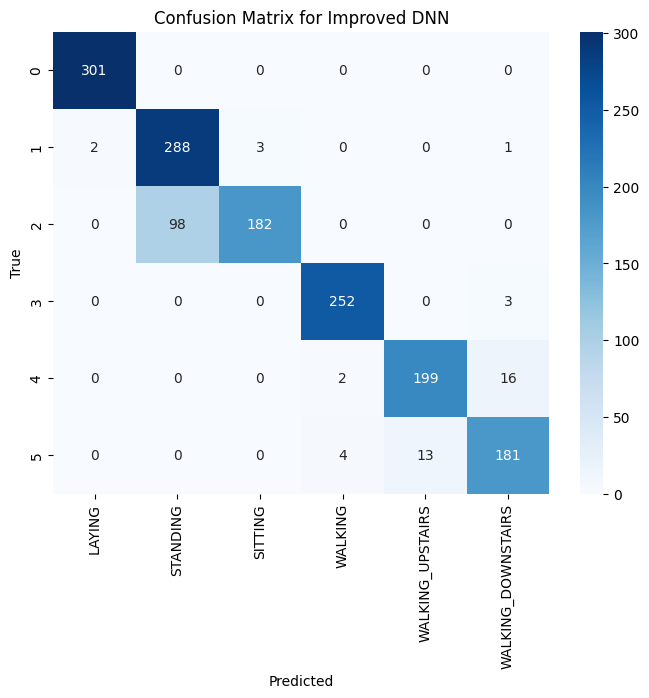

In [56]:
# print(confusion_matrix(y_true, y_hat_d))
# from sklearn.metrics import confusion_matrix
import seaborn as sns


conf_matrix = confusion_matrix(y_true, y_hat_d)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'], yticklabels=range(6))
plt.title('Confusion Matrix for Improved DNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Ploting Results**

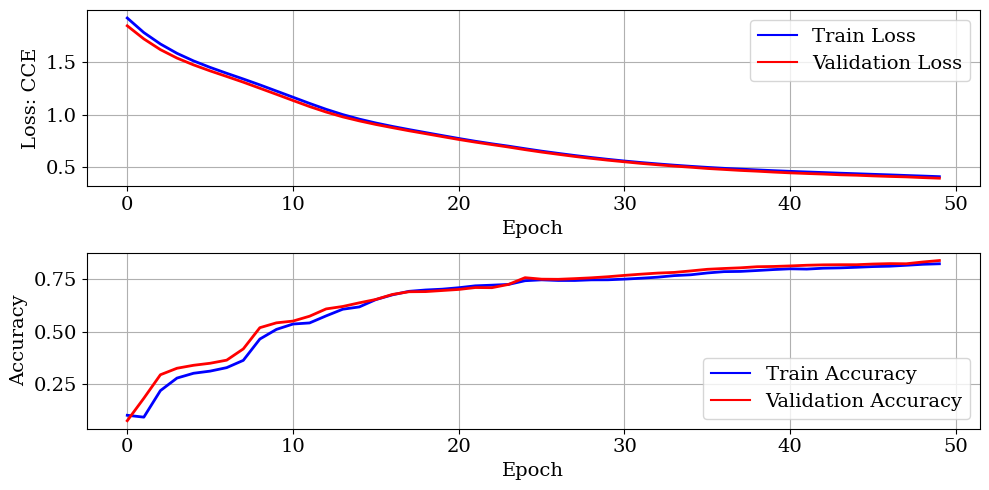

In [57]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss = results.history['loss']
val_loss = results.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss, label='Train Loss', color ='b')
axs[0].plot(val_loss, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc =results.history['accuracy']
val_acc = results.history['val_accuracy']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc, label='Train Accuracy', color ='b')
axs[1].plot(val_acc, label='Validation Accuracy', color='r')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

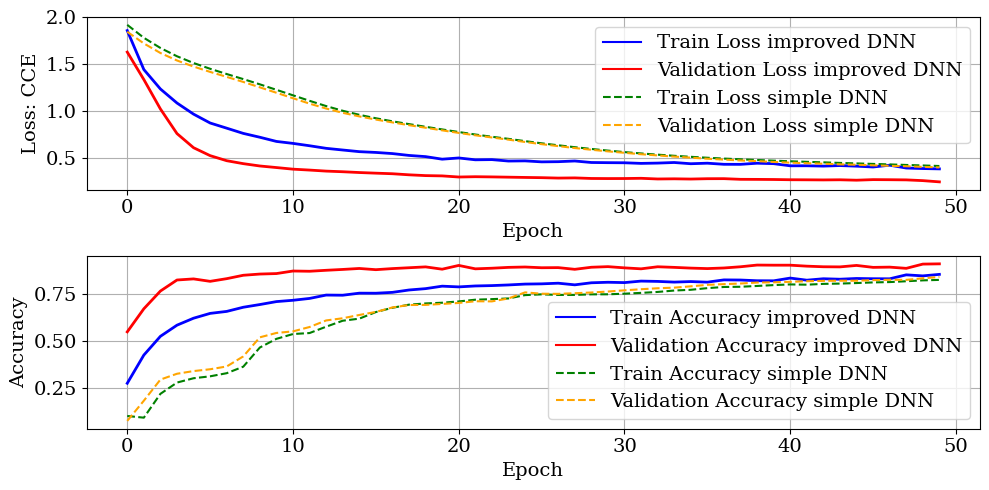

In [58]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss_d = results_d.history['loss']
val_loss_d = results_d.history['val_loss']

train_loss = results.history['loss']
val_loss = results.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss_d, label='Train Loss improved DNN', color ='b')
axs[0].plot(val_loss_d, label='Validation Loss improved DNN', color='r')
axs[0].plot(train_loss, label='Train Loss simple DNN', color ='g', linestyle='--')
axs[0].plot(val_loss, label='Validation Loss simple DNN', color='orange', linestyle='--')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc_d =results_d.history['accuracy']
val_acc_d = results_d.history['val_accuracy']
train_acc =results.history['accuracy']
val_acc = results.history['val_accuracy']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc_d, label='Train Accuracy improved DNN', color ='b')
axs[1].plot(val_acc_d, label='Validation Accuracy improved DNN', color='r')
axs[1].plot(train_acc, label='Train Accuracy simple DNN', color ='g', linestyle='--')
axs[1].plot(val_acc, label='Validation Accuracy simple DNN', color='orange', linestyle='--')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

# RNNs

## RNN

In [59]:
def create_lstm_dataset(window_size, dataset):
    """
    Create an LSTM dataset by moving a window through the input dataset.

    Parameters:
    - window_size: Size of the sliding window.
    - dataset: Input dataset in the shape (samples, features).

    Returns:
    - Tuple containing the reshaped input data (X) and corresponding target data (y).
      The shapes are (batches, window_size, features) for X and (batches, features) for y.
    """
    num_samples = len(dataset)
    num_batches = num_samples - window_size

    X, y = [], []

    for i in range(num_batches):
        window = dataset[i : i + window_size, :]
        target = dataset[i + window_size, :]  # Next data point after the window

        X.append(window)
        y.append(target)

    X = np.array(X)
    y = np.array(y)

    return X, y

In [60]:
X_train_normalized.shape

(7209, 5)

In [61]:
x_train_RNN, _ = create_lstm_dataset(3, X_train_normalized)
x_test_RNN, _ = create_lstm_dataset(3, X_test_normalized)
y_train_RNN = y_train[:-3]
y_test_RNN = y_test[:-3]

print(y_train_RNN.shape)
print(x_train_RNN.shape)

(7206, 6)
(7206, 3, 5)


In [62]:
x_val_RNN, _ = create_lstm_dataset(3, X_val_normalized)
y_val_RNN = y_val[:-3]

In [111]:
# x_train = X_train_normalized.reshape(X_train_normalized.shape[0], 1, X_train_normalized.shape[1])
# x_test = X_test_normalized.reshape(X_test_normalized.shape[0], 1, X_test_normalized.shape[1])
# print(y_train.shape)
# print(x_train.shape)

In [63]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , )
print ('Train set:', x_train_RNN.shape,  y_train_RNN.shape)
print ('Test set:', x_test_RNN.shape,  y_test_RNN.shape)
print ('Test set:', x_val_RNN.shape,  y_val.shape)

Train set: (7206, 3, 5) (7206, 6)
Test set: (1542, 3, 5) (1542, 6)
Test set: (1542, 3, 5) (1545, 6)


In [64]:
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy

In [65]:
model_RNN = Sequential()
model_RNN.add(SimpleRNN(12,activation='relu', return_sequences=False,  input_shape=(3,5)))
model_RNN.add(Dense(6, activation='softmax'))
model_RNN.summary()


opt = Adam(lr = 0.001)
loss = categorical_crossentropy
model_RNN.compile(optimizer = opt, loss = loss, metrics = 'acc')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 12)                216       
                                                                 
 dense_19 (Dense)            (None, 6)                 78        
                                                                 
Total params: 294 (1.15 KB)
Trainable params: 294 (1.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
results_RNN = model_RNN.fit(x_train_RNN, y_train_RNN, batch_size = 128, epochs = 50, validation_data = (x_val_RNN, y_val_RNN), callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='loss')])

Epoch 1/50
57/57 [==============================] - 2s 10ms/step - loss: 1.8172 - acc: 0.2410 - val_loss: 1.7485 - val_acc: 0.2685
Epoch 2/50
57/57 [==============================] - 0s 7ms/step - loss: 1.6950 - acc: 0.2998 - val_loss: 1.6224 - val_acc: 0.3392
Epoch 3/50
57/57 [==============================] - 0s 6ms/step - loss: 1.5201 - acc: 0.3790 - val_loss: 1.4053 - val_acc: 0.4209
Epoch 4/50
57/57 [==============================] - 0s 6ms/step - loss: 1.2710 - acc: 0.4804 - val_loss: 1.1302 - val_acc: 0.5389
Epoch 5/50
57/57 [==============================] - 0s 6ms/step - loss: 1.0008 - acc: 0.5899 - val_loss: 0.8625 - val_acc: 0.6304
Epoch 6/50
57/57 [==============================] - 0s 7ms/step - loss: 0.7617 - acc: 0.6823 - val_loss: 0.6530 - val_acc: 0.7134
Epoch 7/50
57/57 [==============================] - 0s 6ms/step - loss: 0.5986 - acc: 0.7472 - val_loss: 0.5322 - val_acc: 0.7704
Epoch 8/50
57/57 [==============================] - 0s 6ms/step - loss: 0.5041 - acc: 0.7

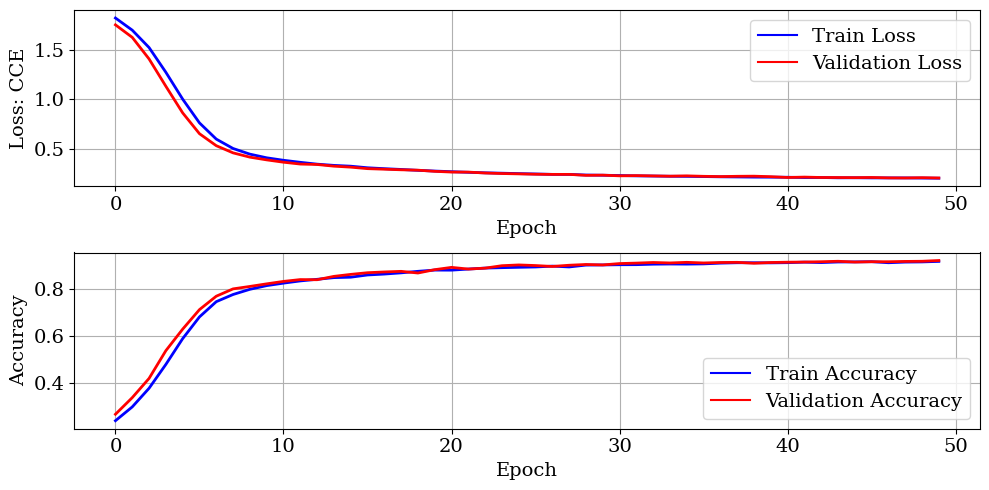

In [67]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss_RNN = results_RNN.history['loss']
val_loss_RNN = results_RNN.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss_RNN, label='Train Loss', color ='b')
axs[0].plot(val_loss_RNN, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc_RNN =results_RNN.history['acc']
val_acc_RNN = results_RNN.history['val_acc']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc_RNN, label='Train Accuracy', color ='b')
axs[1].plot(val_acc_RNN, label='Validation Accuracy', color='r')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

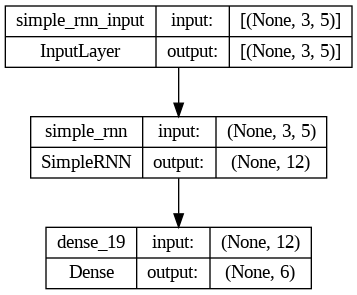

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model_RNN, show_shapes=True)

In [69]:
y_hat_RNN = model_RNN.predict(x_test_RNN)

y_hat_RNN = np.argmax(y_hat_RNN, axis=1)

y_true_RNN = np.argmax(y_test_RNN, axis=1)

49/49 [==============================] - 0s 2ms/step


In [70]:
print(classification_report(y_true_RNN, y_hat_RNN))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       0.85      0.79      0.82       294
           2       0.80      0.85      0.83       280
           3       0.98      0.98      0.98       255
           4       0.95      0.92      0.93       216
           5       0.90      0.93      0.91       198

    accuracy                           0.91      1542
   macro avg       0.91      0.91      0.91      1542
weighted avg       0.91      0.91      0.91      1542



## GRU

In [71]:
from tensorflow.keras.layers import GRU

In [72]:
model_GRU = Sequential()
model_GRU.add(GRU(24,activation='relu', return_sequences=True,  input_shape=(3, 5)))
model_GRU.add(GRU(12,activation='relu', return_sequences=False))
model_GRU.add(Dense(6, activation='softmax'))
model_GRU.summary()



opt = Adam(lr = 0.001)
loss = categorical_crossentropy
model_GRU.compile(optimizer = opt, loss = loss, metrics = 'acc')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3, 24)             2232      
                                                                 
 gru_1 (GRU)                 (None, 12)                1368      
                                                                 
 dense_20 (Dense)            (None, 6)                 78        
                                                                 
Total params: 3678 (14.37 KB)
Trainable params: 3678 (14.37 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [73]:
results_GRU = model_GRU.fit(x_train_RNN, y_train_RNN, batch_size = 128, epochs = 50, validation_data = (x_val_RNN, y_val_RNN))

Epoch 1/50
57/57 [==============================] - 4s 23ms/step - loss: 1.7785 - acc: 0.2205 - val_loss: 1.7342 - val_acc: 0.3528
Epoch 2/50
57/57 [==============================] - 1s 16ms/step - loss: 1.6156 - acc: 0.4102 - val_loss: 1.4225 - val_acc: 0.4637
Epoch 3/50
57/57 [==============================] - 1s 16ms/step - loss: 1.0870 - acc: 0.5687 - val_loss: 0.7593 - val_acc: 0.7043
Epoch 4/50
57/57 [==============================] - 2s 33ms/step - loss: 0.5181 - acc: 0.7909 - val_loss: 0.3706 - val_acc: 0.8482
Epoch 5/50
57/57 [==============================] - 1s 26ms/step - loss: 0.3301 - acc: 0.8526 - val_loss: 0.3073 - val_acc: 0.8625
Epoch 6/50
57/57 [==============================] - 1s 16ms/step - loss: 0.2882 - acc: 0.8712 - val_loss: 0.2817 - val_acc: 0.8742
Epoch 7/50
57/57 [==============================] - 1s 16ms/step - loss: 0.2730 - acc: 0.8782 - val_loss: 0.2847 - val_acc: 0.8748
Epoch 8/50
57/57 [==============================] - 1s 17ms/step - loss: 0.2606 - a

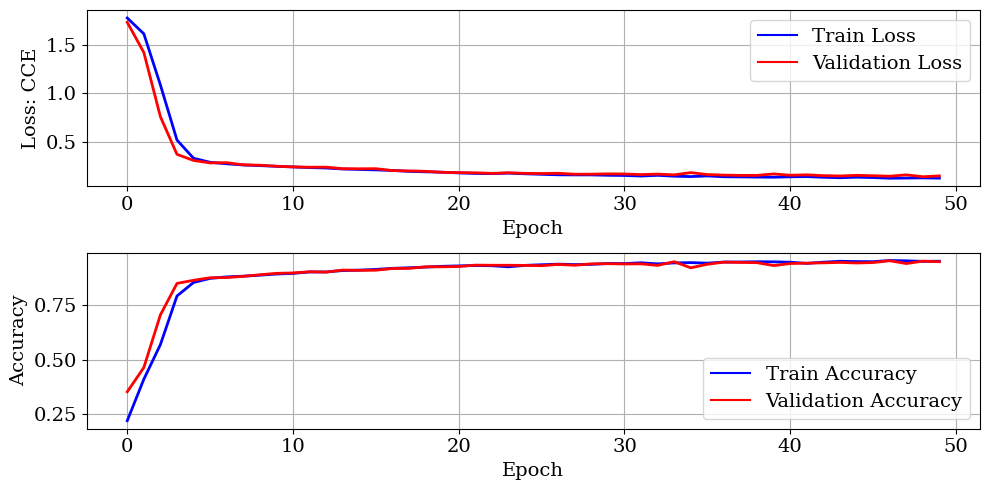

In [74]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss_GRU = results_GRU.history['loss']
val_loss_GRU = results_GRU.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss_GRU, label='Train Loss', color ='b')
axs[0].plot(val_loss_GRU, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc_GRU =results_GRU.history['acc']
val_acc_GRU = results_GRU.history['val_acc']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc_GRU, label='Train Accuracy', color ='b')
axs[1].plot(val_acc_GRU, label='Validation Accuracy', color='r')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

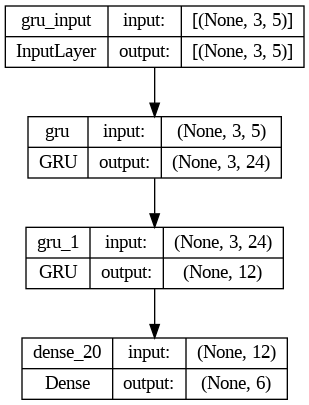

In [75]:
from tensorflow.keras.utils import plot_model
plot_model(model_GRU, show_shapes=True)

In [76]:
y_hat_GRU = model_RNN.predict(x_test_RNN)

y_hat_GRU = np.argmax(y_hat_GRU, axis=1)

y_true_GRU = np.argmax(y_test_RNN, axis=1)

49/49 [==============================] - 0s 2ms/step


In [77]:
print(classification_report(y_true_GRU, y_hat_GRU))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       0.85      0.79      0.82       294
           2       0.80      0.85      0.83       280
           3       0.98      0.98      0.98       255
           4       0.95      0.92      0.93       216
           5       0.90      0.93      0.91       198

    accuracy                           0.91      1542
   macro avg       0.91      0.91      0.91      1542
weighted avg       0.91      0.91      0.91      1542



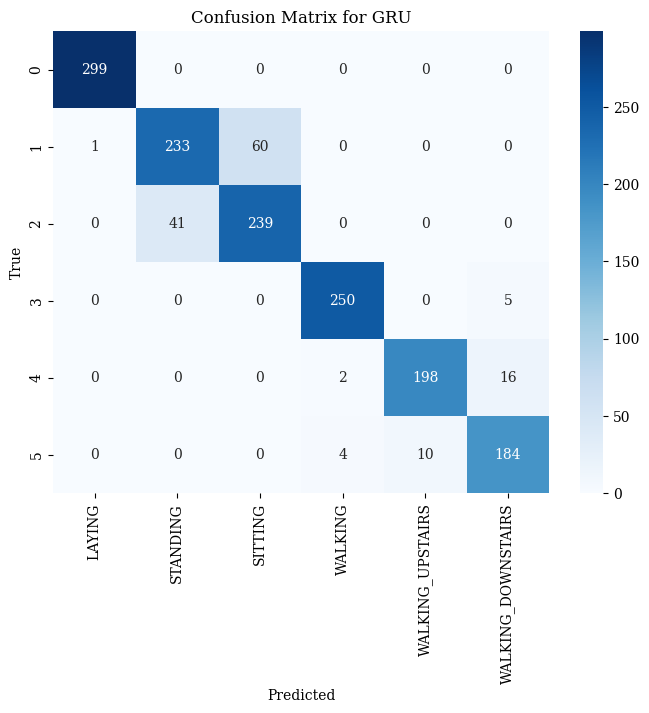

In [78]:
import seaborn as sns


conf_matrix = confusion_matrix(y_true_GRU, y_hat_GRU)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'], yticklabels=range(6))
plt.title('Confusion Matrix for GRU')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Bidirectional GRU

In [79]:
from tensorflow.keras.layers import Embedding, Bidirectional


model_bGRU = Sequential()
model_bGRU.add(Bidirectional(GRU(24,activation='relu'), input_shape=(3, 5)))
model_bGRU.add(Dense(12, activation='relu'))
model_bGRU.add(Dense(6, activation='softmax'))
model_bGRU.summary()



opt = Adam(lr = 0.001)
loss = categorical_crossentropy
model_bGRU.compile(optimizer = opt, loss = loss, metrics = 'acc')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 48)                4464      
 al)                                                             
                                                                 
 dense_21 (Dense)            (None, 12)                588       
                                                                 
 dense_22 (Dense)            (None, 6)                 78        
                                                                 
Total params: 5130 (20.04 KB)
Trainable params: 5130 (20.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
results_bGRU = model_bGRU.fit(x_train_RNN, y_train_RNN, batch_size = 64, epochs = 50, validation_data = (x_val_RNN, y_val_RNN))

Epoch 1/50
113/113 [==============================] - 6s 26ms/step - loss: 1.5779 - acc: 0.4142 - val_loss: 1.1215 - val_acc: 0.6459
Epoch 2/50
113/113 [==============================] - 2s 15ms/step - loss: 0.6875 - acc: 0.7435 - val_loss: 0.4400 - val_acc: 0.8243
Epoch 3/50
113/113 [==============================] - 2s 14ms/step - loss: 0.4021 - acc: 0.8300 - val_loss: 0.3765 - val_acc: 0.8314
Epoch 4/50
113/113 [==============================] - 2s 14ms/step - loss: 0.3505 - acc: 0.8439 - val_loss: 0.3416 - val_acc: 0.8541
Epoch 5/50
113/113 [==============================] - 2s 14ms/step - loss: 0.3250 - acc: 0.8539 - val_loss: 0.3324 - val_acc: 0.8567
Epoch 6/50
113/113 [==============================] - 2s 14ms/step - loss: 0.3082 - acc: 0.8589 - val_loss: 0.3153 - val_acc: 0.8664
Epoch 7/50
113/113 [==============================] - 2s 17ms/step - loss: 0.2957 - acc: 0.8609 - val_loss: 0.3203 - val_acc: 0.8619
Epoch 8/50
113/113 [==============================] - 3s 28ms/step - 

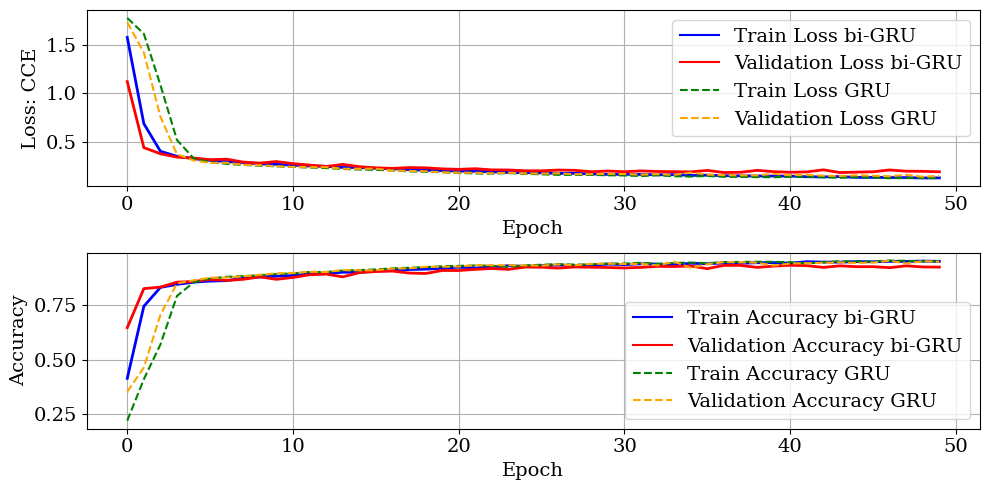

In [81]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss_bGRU = results_bGRU.history['loss']
val_loss_bGRU = results_bGRU.history['val_loss']

train_loss_GRU = results_GRU.history['loss']
val_loss_GRU = results_GRU.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss_bGRU, label='Train Loss bi-GRU', color ='b')
axs[0].plot(val_loss_bGRU, label='Validation Loss bi-GRU', color='r')
axs[0].plot(train_loss_GRU, label='Train Loss GRU', color ='g', linestyle='--')
axs[0].plot(val_loss_GRU, label='Validation Loss GRU', color='orange', linestyle='--')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc_bGRU =results_bGRU.history['acc']
val_acc_bGRU = results_bGRU.history['val_acc']

train_acc_GRU =results_GRU.history['acc']
val_acc_GRU = results_GRU.history['val_acc']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc_bGRU, label='Train Accuracy bi-GRU', color ='b')
axs[1].plot(val_acc_bGRU, label='Validation Accuracy bi-GRU', color='r')
axs[1].plot(train_acc_GRU, label='Train Accuracy GRU', color ='g', linestyle='--')
axs[1].plot(val_acc_GRU, label='Validation Accuracy GRU', color='orange', linestyle='--')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

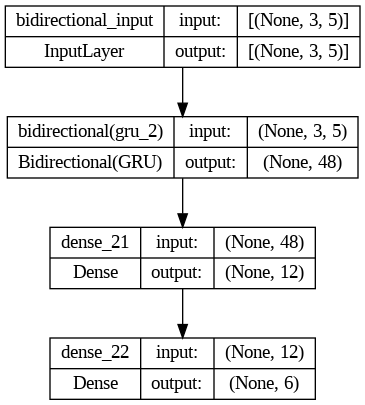

In [82]:
from tensorflow.keras.utils import plot_model
plot_model(model_bGRU, show_shapes=True)

In [83]:
print("Results of Loss:")
# print("\nTest Loss of SimpleRNN:", results_RNN.history['val_loss'][-1])
# print("Test Loss of GRU:", results_GRU.history['val_loss'][-1])
print("Test Loss of Bidirectional GRU:", results_bGRU.history['val_loss'][-1])

print("\n\n\nResults of Accuracy:")
# print("\nTest Accuracy of SimpleRNN:", val_acc_RNN[-1])
# print("Test Accuracy of GRU:", val_acc_GRU[-1])
print("Test Accuracy of Bidirectional GRU:", val_acc_bGRU[-1])

Results of Loss:
Test Loss of Bidirectional GRU: 0.19013655185699463



Results of Accuracy:
Test Accuracy of Bidirectional GRU: 0.9228274822235107


In [84]:
# y_hat = MLP_model.predict(x_test_mlp)
y_hat_bGRU = model_bGRU.predict(x_test_RNN)

# y_hat = np.argmax(y_hat, axis=1)
y_hat_bGRU = np.argmax(y_hat_bGRU, axis=1)

y_true_bGRU = np.argmax(y_test_RNN, axis=1)

49/49 [==============================] - 0s 3ms/step


In [85]:
print(classification_report(y_true_bGRU, y_hat_bGRU))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       299
           1       0.83      0.88      0.86       294
           2       0.87      0.81      0.84       280
           3       0.97      0.98      0.98       255
           4       0.91      0.93      0.92       216
           5       0.92      0.89      0.90       198

    accuracy                           0.92      1542
   macro avg       0.92      0.92      0.92      1542
weighted avg       0.92      0.92      0.92      1542



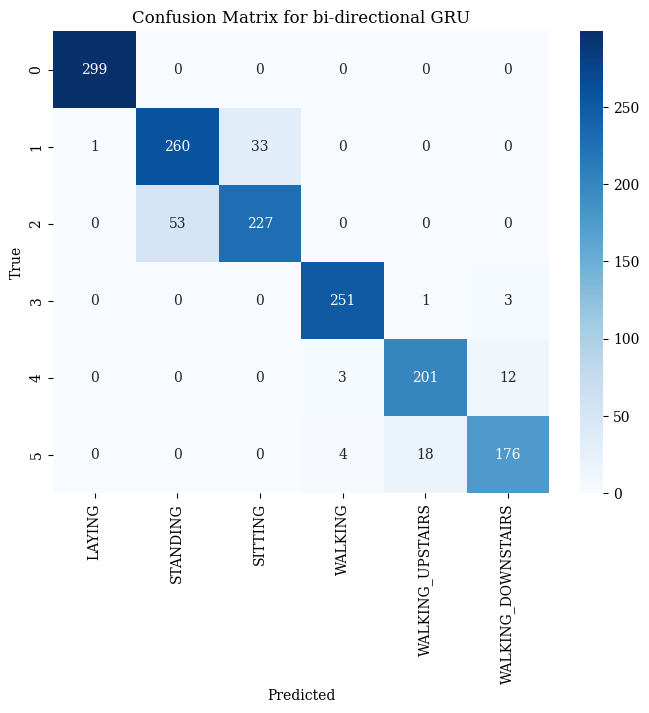

In [86]:
# print(confusion_matrix(y_true, y_hat_d))

conf_matrix = confusion_matrix(y_true_bGRU, y_hat_bGRU)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'], yticklabels=range(6))
plt.title('Confusion Matrix for bi-directional GRU')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

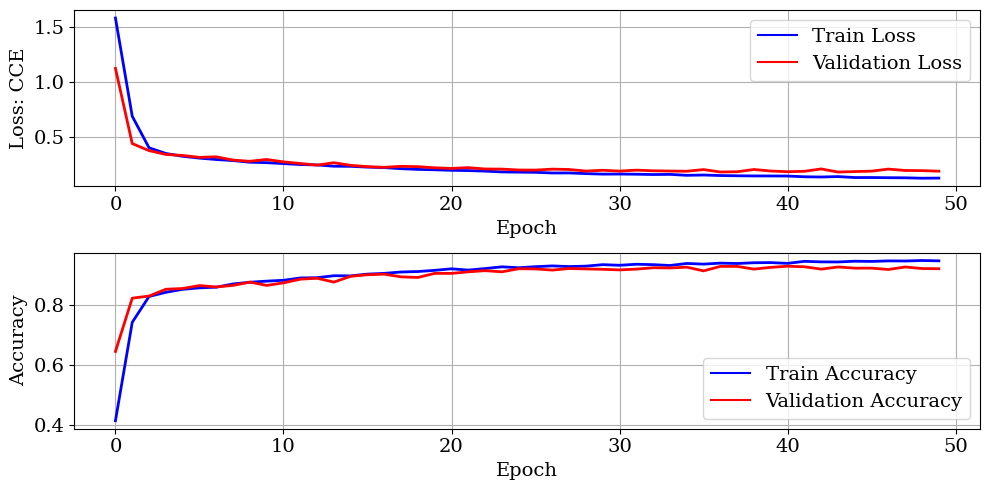

In [87]:
# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss_bGRU = results_bGRU.history['loss']
val_loss_bGRU = results_bGRU.history['val_loss']


# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss_bGRU, label='Train Loss', color ='b')
axs[0].plot(val_loss_bGRU, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc_bGRU =results_bGRU.history['acc']
val_acc_bGRU = results_bGRU.history['val_acc']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc_bGRU, label='Train Accuracy', color ='b')
axs[1].plot(val_acc_bGRU, label='Validation Accuracy', color='r')

# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()

# Optimization (Hyperparameter tuning)

## Grid search

In [88]:
X_train.shape

(7209, 5)

In [89]:
y_train_RNN.shape

(7206, 6)

In [90]:
pip install scikeras

In [91]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.1 MB/s eta 0:00:00


### Number of Layers

In [92]:
from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dense
from keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
from skopt.space import Real, Categorical, Integer
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.layers import Embedding, Bidirectional


# Function to create the model
# def create_model(learning_rate=0.001, num_layers=1, optimizer='adam', activation_function='relu'):
def create_model(num_layers):



    model = Sequential()
    #input layer
    model.add(Input(5,))

    #hidden layers
    model.add(Dense(24, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())

    for _ in range(num_layers):
      model.add(Dense(24, activation='relu'))
      model.add(Dropout(0.1))
      model.add(BatchNormalization())


    #outputlayers
    model.add(Dense(6, activation = 'softmax'))


    # opt = Adam(lr=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    print("Model!")

    return model

# Create KerasClassifier for GridSearchCV
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=64, verbose=0, learning_rate=Real(0.0001, 0.1), num_layers=Integer(1, 5), activation_function=Categorical('tanh', 'sigmoid', 'relu', 'elu'))
# model = KerasClassifier(model=create_model, loss='categorical_crossentropy', epochs=50, batch_size=64, verbose=0, num_layers=[1, 2, 3, 4, 5])
model = KerasClassifier(model=create_model, epochs=50, batch_size=64, verbose=0, num_layers=[1, 2, 3, 4, 5])

# Define the parameter grid
param_grid = {
    # 'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    'num_layers': [1, 2, 3, 4, 5, 6]
    # 'optimizer': ['adam', 'sgd', 'rmsprop'],
    # 'activation_function': ['tanh', 'sigmoid', 'relu', 'elu'],
    # 'dropout': [0.1, 0.2, 0.3, 0.4]
    # 'activation_function': ['tanh', 'sigmoid', 'relu']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, error_score='raise')

# Fit the model to the data
grid_result = grid.fit(X_train_normalized, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Best: 0.945069 using {'num_layers': 1}
0.945069 (0.005028) with: {'num_layers': 1}
0.934665 (0.019879) with: {'num_layers': 2}
0.937439 (0.015212) with: {'num_layers': 3}
0.914690 (0.021535) with: {'num_layers': 4}
0.909557 (0.019579) with: {'num_layers': 5}
0.890831 (0.013148) with: {'num_layers': 6}


In [93]:
# Access the best parameters and print them
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'num_layers': 1}


### Activation function

In [94]:
from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dense
from keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
from skopt.space import Real, Categorical, Integer
from tensorflow.keras.layers import Dropout, BatchNormalization


# Function to create the model
# def create_model(learning_rate=0.001, num_layers=1, optimizer='adam', activation_function='relu'):
def create_model(activation_function):

    model = Sequential()
    #input layer
    model.add(Input(5,))

    #hidden layers
    model.add(Dense(24, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(BatchNormalization())

    for _ in range(1):
      model.add(Dense(24, activation='relu'))
      model.add(Dropout(0.1))
      model.add(BatchNormalization())


    #outputlayers
    model.add(Dense(6, activation = 'softmax'))

    print("Model!")


    # opt = Adam(lr=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create KerasClassifier for GridSearchCV
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=64, verbose=0, learning_rate=Real(0.0001, 0.1), num_layers=Integer(1, 5), activation_function=Categorical('tanh', 'sigmoid', 'relu', 'elu'))
model = KerasClassifier(model=create_model, loss='categorical_crossentropy', epochs=50, batch_size=64, verbose=0, activation_function=['tanh', 'sigmoid', 'relu', 'elu'])

# Define the parameter grid
param_grid = {
    # 'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    # 'num_layers': [1, 2, 3, 4, 5]
    # 'optimizer': ['adam', 'sgd', 'rmsprop'],
    'activation_function': ['tanh', 'sigmoid', 'relu', 'elu']
    # 'dropout': [0.1, 0.2, 0.3, 0.4]
    # 'activation_function': ['tanh', 'sigmoid', 'relu']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model to the data
grid_result = grid.fit(X_train_normalized, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Model!
Best: 0.949508 using {'activation_function': 'sigmoid'}
0.945069 (0.002067) with: {'activation_function': 'tanh'}
0.949508 (0.003938) with: {'activation_function': 'sigmoid'}
0.939936 (0.011302) with: {'activation_function': 'relu'}
0.949230 (0.002122) with: {'activation_function': 'elu'}


In [96]:
# Access the best parameters and print them
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'activation_function': 'sigmoid'}


### ِDropout

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dense
from keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
from skopt.space import Real, Categorical, Integer
from tensorflow.keras.layers import Dropout, BatchNormalization


# Function to create the model
# def create_model(learning_rate=0.001, num_layers=1, optimizer='adam', activation_function='relu'):
def create_model(dropout):

    model = Sequential()
    #input layer
    model.add(Input(5,))

    #hidden layers
    model.add(Dense(24, activation = 'elu'))
    model.add(Dropout(dropout))
    model.add(BatchNormalization())

    for _ in range(1):
      model.add(Dense(24, activation='elu'))
      model.add(Dropout(dropout))
      model.add(BatchNormalization())


    #outputlayers
    model.add(Dense(6, activation = 'softmax'))

    print("Model!")


    # opt = Adam(lr=learning_rate)
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create KerasClassifier for GridSearchCV
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=64, verbose=0, learning_rate=Real(0.0001, 0.1), num_layers=Integer(1, 5), activation_function=Categorical('tanh', 'sigmoid', 'relu', 'elu'))
model = KerasClassifier(model=create_model, loss='categorical_crossentropy', epochs=50, batch_size=64, verbose=0, dropout=[0, 0.1, 0.2, 0.3, 0.4])

# Define the parameter grid
param_grid = {
    # 'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    # 'num_layers': [1, 2, 3, 4, 5]
    # 'optimizer': ['adam', 'sgd', 'rmsprop'],
    # 'activation_function': ['tanh', 'sigmoid', 'relu', 'elu']
    'dropout': [0, 0.1, 0.2, 0.3, 0.4]
    # 'activation_function': ['tanh', 'sigmoid', 'relu']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model to the data
grid_result = grid.fit(X_train_normalized, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Access the best parameters and print them
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

### Optimizer

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dense
from keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
from skopt.space import Real, Categorical, Integer
from tensorflow.keras.layers import Dropout, BatchNormalization


# Function to create the model
# def create_model(learning_rate=0.001, num_layers=1, optimizer='adam', activation_function='relu'):
def create_model():

    model = Sequential()
    #input layer
    model.add(Input(5,))

    #hidden layers
    model.add(Dense(24, activation = 'elu'))
    # model.add(Dropout(dropout))
    model.add(BatchNormalization())

    for _ in range(1):
      model.add(Dense(24, activation='elu'))
      # model.add(Dropout(dropout))
      model.add(BatchNormalization())


    #outputlayers
    model.add(Dense(6, activation = 'softmax'))

    print("Model!")


    # opt = Adam(lr=learning_rate)
    # model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create KerasClassifier for GridSearchCV
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=64, verbose=0, learning_rate=Real(0.0001, 0.1), num_layers=Integer(1, 5), activation_function=Categorical('tanh', 'sigmoid', 'relu', 'elu'))
model = KerasClassifier(model=create_model, loss='categorical_crossentropy', epochs=50, batch_size=64, verbose=0, optimizer=['adam', 'sgd', 'rmsprop'])

# Define the parameter grid
param_grid = {
    # 'learning_rate': [0.0001, 0.001, 0.01, 0.1],
    # 'num_layers': [1, 2, 3, 4, 5]
    'optimizer': ['adam', 'sgd', 'rmsprop']
    # 'activation_function': ['tanh', 'sigmoid', 'relu', 'elu']
    # 'dropout': [0, 0.1, 0.2, 0.3, 0.4]
    # 'activation_function': ['tanh', 'sigmoid', 'relu']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model to the data
grid_result = grid.fit(X_train_normalized, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Access the best parameters and print them
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

### Learning rate

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, GRU, Dense
from keras.optimizers import Adam
# from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import numpy as np
from skopt.space import Real, Categorical, Integer
from tensorflow.keras.layers import Dropout, BatchNormalization


# Function to create the model
# def create_model(learning_rate=0.001, num_layers=1, optimizer='adam', activation_function='relu'):
def create_model(learning_rate):

    model = Sequential()
    #input layer
    model.add(Input(5,))

    #hidden layers
    model.add(Dense(24, activation = 'elu'))
    # model.add(Dropout(dropout))
    model.add(BatchNormalization())

    for _ in range(1):
      model.add(Dense(24, activation='elu'))
      # model.add(Dropout(dropout))
      model.add(BatchNormalization())


    #outputlayers
    model.add(Dense(6, activation = 'softmax'))

    print("Model!")


    opt = Adam(lr=learning_rate)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create KerasClassifier for GridSearchCV
# model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=64, verbose=0, learning_rate=Real(0.0001, 0.1), num_layers=Integer(1, 5), activation_function=Categorical('tanh', 'sigmoid', 'relu', 'elu'))
model = KerasClassifier(model=create_model, loss='categorical_crossentropy', epochs=50, batch_size=64, verbose=0, learning_rate=[0.0001, 0.001, 0.01, 0.1])

# Define the parameter grid
param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01, 0.1]
    # 'num_layers': [1, 2, 3, 4, 5]
    # 'optimizer': ['adam', 'sgd', 'rmsprop'],
    # 'activation_function': ['tanh', 'sigmoid', 'relu', 'elu']
    # 'dropout': [0, 0.1, 0.2, 0.3, 0.4]
    # 'activation_function': ['tanh', 'sigmoid', 'relu']
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

# Fit the model to the data
grid_result = grid.fit(X_train_normalized, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# Access the best parameters and print them
best_params = grid_result.best_params_
print("Best Parameters:", best_params)

## Genatic Algorithm

### Number of Neurons

In [ ]:
pip install deap

In [ ]:
import random
from deap import base, creator, tools, algorithms
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Input
from keras.optimizers import Adam

# Define the problem
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Define the range of possible number of neurons
NUM_NEURON_LOW = 5
NUM_NEURON_HIGH = 128

# Function to create the model
def create_model(num_neurons):
    model = Sequential()
    model.add(Input(5,))
    model.add(Dense(num_neurons, activation='elu'))
    model.add(BatchNormalization())
    model.add(Dense(num_neurons, activation='elu'))
    model.add(BatchNormalization())
    model.add(Dense(6, activation='softmax'))
    opt = Adam(lr=0.1)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Function to evaluate an individual's fitness
def evaluate(individual):
    num_neurons = int(individual[0])
    model = create_model(num_neurons)
    # Add your training and evaluation logic here, replace X_train and y_train with your data
    fitness = model.evaluate(X_train, y_train)[1]
    return fitness,

# DEAP initialization
toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, NUM_NEURON_LOW, NUM_NEURON_HIGH)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=10, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

# Main evolution loop
if __name__ == "__main__":
    population_size = 10
    num_generations = 5

    population = toolbox.population(n=population_size)

    algorithms.eaMuPlusLambda(population, toolbox, mu=population_size, lambda_=population_size, cxpb=0.7, mutpb=0.2, ngen=num_generations, stats=None, halloffame=None, verbose=True)

    # Extract the best individual
    best_individual = tools.selBest(population, k=1)[0]
    best_num_neurons = int(best_individual[0])

    print("Best Number of Neurons:", best_num_neurons)

## Optimmized model

- Learning rate = 0.1
- Num neurons = 79
- Activation = elu
- optimizer = Adam
- dropout = 0
- Num hidden layers = 1

In [207]:
def best_model(num_neurons=79):
    model = Sequential()
    model.add(Input(5,))
    model.add(Dense(num_neurons, activation='elu'))
    model.add(BatchNormalization())
    model.add(Dense(num_neurons, activation='elu'))
    model.add(BatchNormalization())
    model.add(Dense(6, activation='softmax'))
    opt = Adam(lr=0.1)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

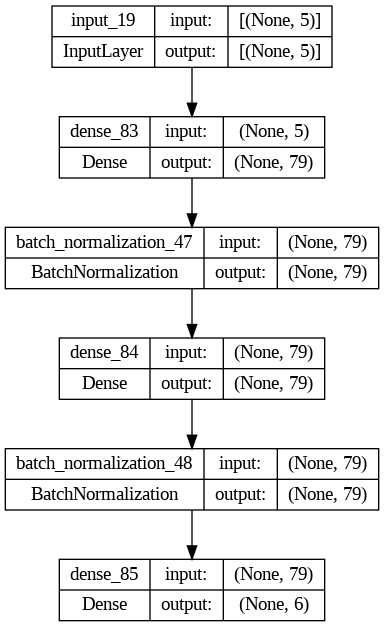

In [208]:
from tensorflow.keras.utils import plot_model

Best_model = best_model()
plot_model(Best_model, show_shapes=True)

In [209]:
import tensorflow as tf
results = Best_model.fit(X_train_normalized, y_train, batch_size = 128, epochs = 50, validation_data = (X_val_normalized, y_val), callbacks = [tf.keras.callbacks.EarlyStopping(patience=5, monitor='loss')])

Epoch 1/50
57/57 [==============================] - 2s 14ms/step - loss: 0.5911 - accuracy: 0.7742 - val_loss: 0.7021 - val_accuracy: 0.8129
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8521 - val_loss: 0.4998 - val_accuracy: 0.8524
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.3139 - accuracy: 0.8638 - val_loss: 0.3906 - val_accuracy: 0.8647
Epoch 4/50
57/57 [==============================] - 0s 4ms/step - loss: 0.2999 - accuracy: 0.8695 - val_loss: 0.3348 - val_accuracy: 0.8576
Epoch 5/50
57/57 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.8704 - val_loss: 0.3160 - val_accuracy: 0.8576
Epoch 6/50
57/57 [==============================] - 0s 3ms/step - loss: 0.2819 - accuracy: 0.8731 - val_loss: 0.2951 - val_accuracy: 0.8699
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.2690 - accuracy: 0.8854 - val_loss: 0.2804 - val_accuracy: 0.8835
Epoch 8/50
57/57 [=

In [210]:
y_hat_best = Best_model.predict(X_test_normalized)

y_hat_best = np.argmax(y_hat_best, axis=1)

y_true_best = np.argmax(y_test, axis=1)

49/49 [==============================] - 0s 2ms/step


In [211]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [212]:
print(classification_report(y_true_best, y_hat_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       0.92      0.96      0.94       294
           2       0.95      0.91      0.93       280
           3       0.98      0.99      0.98       255
           4       0.94      0.93      0.94       217
           5       0.92      0.92      0.92       198

    accuracy                           0.95      1545
   macro avg       0.95      0.95      0.95      1545
weighted avg       0.95      0.95      0.95      1545



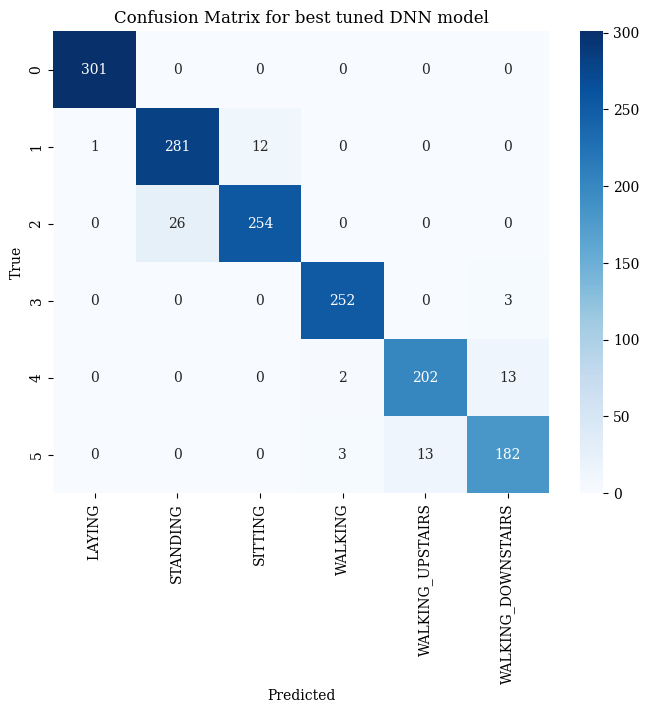

In [213]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true_best, y_hat_best)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['LAYING', 'STANDING', 'SITTING', 'WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS'], yticklabels=range(6))
plt.title('Confusion Matrix for best tuned DNN model')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

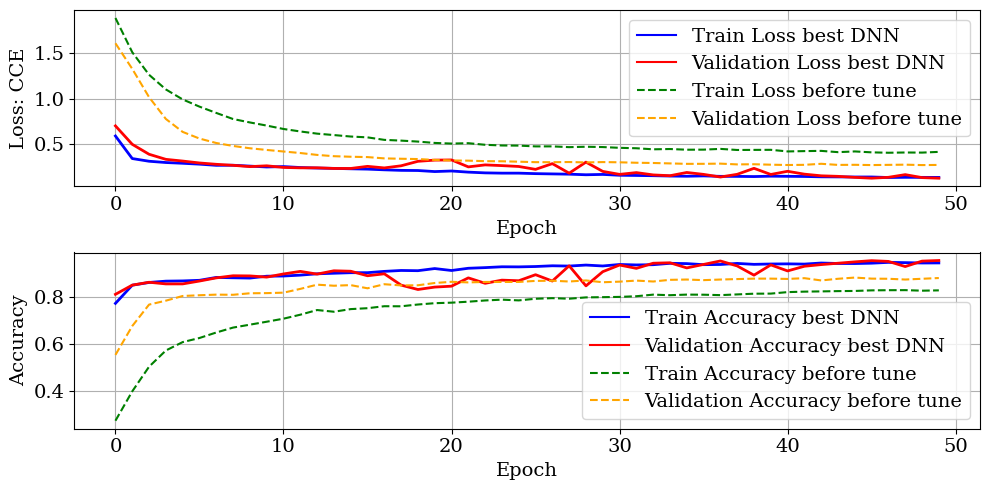

In [214]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss_best = results.history['loss']
val_loss_best = results.history['val_loss']

train_loss_d = results_d.history['loss']
val_loss_d = results_d.history['val_loss']

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs[0].plot(train_loss_best, label='Train Loss best DNN', color ='b')
axs[0].plot(val_loss_best, label='Validation Loss best DNN', color='r')
axs[0].plot(train_loss_d, label='Train Loss before tune', color ='g', linestyle='--')
axs[0].plot(val_loss_d, label='Validation Loss before tune', color='orange', linestyle='--')

# Set the axis labels and title for the top subplot
axs[0].set_xlabel('Epoch', fontsize=fontsize)
axs[0].set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs[0].legend(fontsize=fontsize)
axs[0].grid(True)

# Set the tick labels fontsize for the top subplot
axs[0].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs[0].lines[0].set_linewidth(2)
axs[0].lines[1].set_linewidth(2)



train_acc_best =results.history['accuracy']
val_acc_best = results.history['val_accuracy']
train_acc_d =results_d.history['accuracy']
val_acc_d = results_d.history['val_accuracy']


# Plot the train and validation accuracy in the bottom subplot
axs[1].plot(train_acc_best, label='Train Accuracy best DNN', color ='b')
axs[1].plot(val_acc_best, label='Validation Accuracy best DNN', color='r')
axs[1].plot(train_acc_d, label='Train Accuracy before tune', color ='g', linestyle='--')
axs[1].plot(val_acc_d, label='Validation Accuracy before tune', color='orange', linestyle='--')


# Set the axis labels and title for the bottom subplot
axs[1].set_xlabel('Epoch', fontsize=fontsize)
axs[1].set_ylabel('Accuracy', fontsize=fontsize)

# Set the legend and grid for the bottom subplot
axs[1].legend(fontsize=fontsize)
axs[1].grid(True)

# Set the tick labels fontsize for the bottom subplot
axs[1].tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the bottom subplot
axs[1].lines[0].set_linewidth(2)
axs[1].lines[1].set_linewidth(2)

# Adjust the spacing between the subplots
fig.tight_layout()

# Show the plot
plt.show()